In [ ]:
# 用一行代码创建网格
我们将创建一个2*3的网格子图，每行的3个子图使用相同的y轴坐标，每列的2个子图使用相同的x轴坐标。

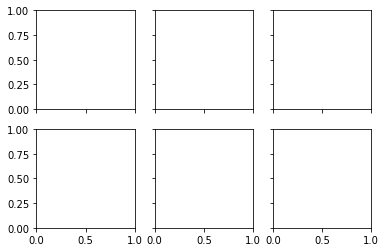

In [2]:
# plt.subplots()方法共享x轴与y轴坐标
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 
                       3, 
                       sharex = 'col', 
                       sharey = 'row')

In [ ]:
确定网格中的子图

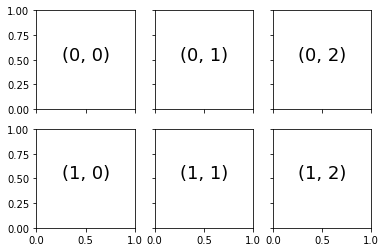

In [4]:
# 坐标轴存放在一个Numpy数组中，按照[row, col]的值
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                     fontsize = 18, ha = 'center')
fig

In [ ]:
## 实现更复杂的排列方式

In [ ]:
### 用plt.GridSpec生成不规则子图

In [5]:
grid = plt.GridSpec(2, 3, wspace = 0.4, hspace = 0.3)

In [ ]:
通过类似切片的语法设置子图的位置和扩展尺寸

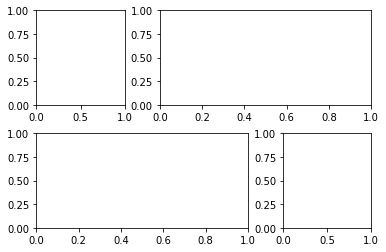

In [6]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);


In [ ]:
### 用plt.GridSpec可视化多维分布数据

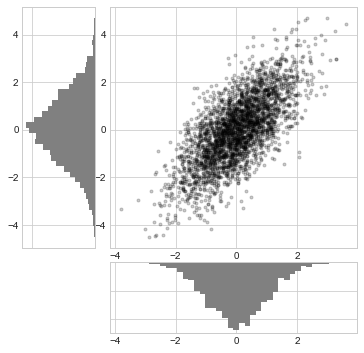

In [39]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [
    [1, 1], 
    [1, 2]
]

x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴赫尔网格配置方式
fig = plt.figure(figsize = (6, 6))
grid = plt.GridSpec(4, 
                    4, 
                    hspace = 0.2, 
                    wspace = 0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], 
                         xticklabels = [], 
                         sharey = main_ax)

x_hist = fig.add_subplot(grid[-1, 1:], 
                         yticklabels = [], 
                         sharex = main_ax)


# 主坐标轴画散点图
main_ax.plot(x, 
             y, 
             'ok', 
             markersize = 3, 
             alpha = 0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 
            40, 
            histtype = 'stepfilled', 
            orientation = 'vertical', 
            color = 'gray')

x_hist.invert_yaxis()

y_hist.hist(y, 
            40, 
            histtype = 'stepfilled', 
            orientation = 'horizontal', 
            color = 'gray')

y_hist.invert_xaxis()

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images2\gridspec.JPG")


In [ ]:
## 文字与注释

In [ ]:
### 案例：节假日对美国出生率的影响

In [18]:
# 导入绘图库
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

births = pd.read_csv(r"D:\Python-Excel\Data-analysis\Python-Data-Science\data\births.csv")

# 自己照着书里写的，卡壳了
# quartiles = np.percentile(births['births'], [25, 50, 75])
# mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
# births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

# births['day'] = births['day'].astype(int)

# births.index = pd.to_datetime(10000 * births.year + 
#                               100 * births.month + 
#                               births.day, 
#                               format='%Y%m%d')

# births_by_date = births.pivot_table('births', 
#                                     [births.index.month, births.index.day])

# births_by_date.index = [pd.to_datetime(2012, month, day) 
#                         for (month, day) in births_by_date.index]

# 源码部分
# quartiles = np.percentile(births['births'], [25, 50, 75])

# mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

# births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

# births['day'] = births['day'].astype(int)

# births.index = pd.to_datetime(10000 * births.year + 
#                               100 * births.month + births.day, 
#                               format='%Y%m%d')

# births_by_date = births.pivot_table('births', 
#                                     [births.index.month, births.index.day])
# births_by_date.index = [pd.datetime(2012, month, day) 
#                         for (month, day) in births_by_date.index]

# 源码第二遍
quartiles = np.percentile(births['births'], 
                          [25, 50, 75]
                         )

mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 
                              100 * births.month + 
                              births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births', 
                                    [births.index.month, 
                                     births.index.day]
                                   )

births_by_date.index = [pd.datetime(2012, month, day) 
                        for (month, day) in births_by_date.index]



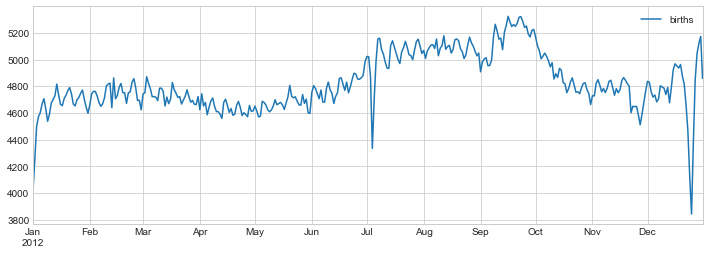

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

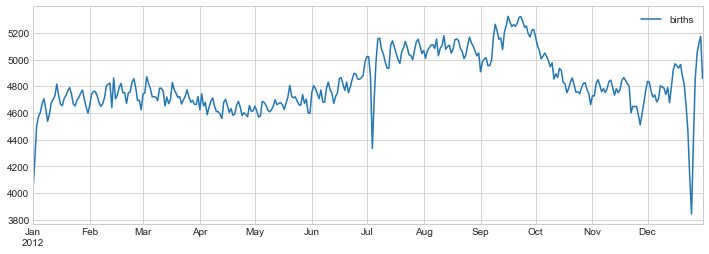

In [40]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images2\births.JPG")

### 未日均出生人数统计图添加注释

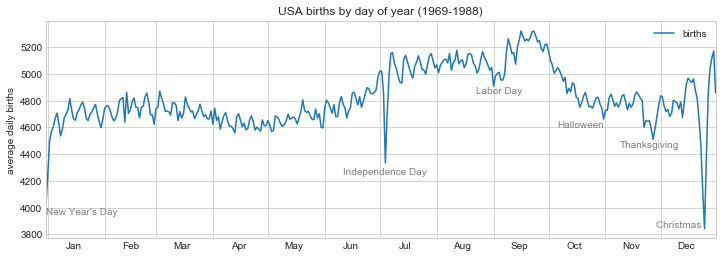

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在图上增加文字标签
style = dict(size=10, color='gray')

ax.text('2012-1-1', 
        3950, 
        "New Year's Day", 
        **style)

ax.text('2012-7-4', 
        4250, 
        "Independence Day", 
        ha = 'center', 
        **style)

ax.text('2012-9-4', 
        4850, 
        "Labor Day", 
        ha  = 'center', 
        **style)

ax.text('2012-10-31', 
        4600, 
        "Halloween", 
        ha = 'right', 
        **style)

ax.text('2012-11-25', 
        4450, 
        "Thanksgiving", 
        ha = 'center', 
        **style)

ax.text('2012-12-25', 
        3850, 
        "Christmas ", 
        ha = 'right', 
        **style)


# 设置坐标轴标题
ax.set(title = 'USA births by day of year (1969-1988)', 
       ylabel = 'average daily births')

# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images2\births3.JPG")


In [ ]:
## 箭头与注释

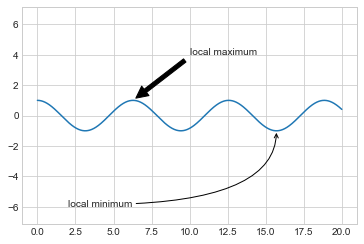

In [36]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', 
            xy=(6.28, 1), 
            xytext=(10, 4), 
            arrowprops=dict(facecolor='black', 
                            shrink=0.05)
           )

ax.annotate('local minimum', 
            xy=(5 * np.pi, -1), 
            xytext=(2, -6), 
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="angle3, angleA=0, angleB=-90")
                           );
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images2\arrows.JPG")

### 带注释的出生日期

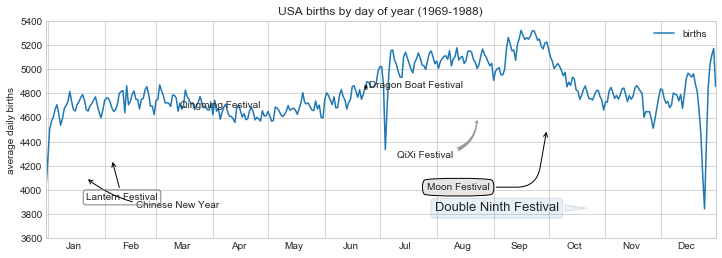

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax=ax)

# 在图上增加箭头标签
ax.annotate("Chinese New Year", 
            xy=("2012-1-23", 4100), 
            xycoords='data',
            xytext=(50, -30), 
            textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', 
                            connectionstyle="arc3, rad=-0.2")
           )

ax.annotate("Lantern Festival", 
            xy=('2012-2-6', 4250), 
            xycoords='data', 
            bbox=dict(boxstyle="round", fc="none", ec="gray"), 
            xytext=(10, -40), 
            textcoords='offset points', 
            ha='center', 
            arrowprops=dict(arrowstyle="->")
           )


ax.annotate("Qingming Festival", 
            xy=('2012-4-5', 4850), 
            xycoords='data', 
            ha= 'center', 
            xytext=(0, -20), 
            textcoords='offset points')

ax.annotate('Dragon Boat Festival', 
            xy=('2012-6-23', 4850), 
            xytext=('2012-6-25', 4850), 
            xycoords='data', 
            textcoords='data', 
            arrowprops={'arrowstyle': '|-|, widthA=0.2, widthB=0.2',})
                        
ax.annotate('QiXi Festival', 
            xy=('2012-8-23', 4600), 
            xycoords='data', 
            xytext=(-80, -40), 
            textcoords='offset points', 
            arrowprops=dict(arrowstyle="fancy", 
                            fc="0.6", 
                            ec="none", 
                            connectionstyle="angle3, angleA=0, angleB=-90")
           )

ax.annotate('Moon Festival', 
            xy=('2012-9-30', 4500), 
            xycoords='data', 
            xytext=(-120, -60), 
            textcoords='offset points', 
            bbox=dict(boxstyle="round4, pad=.5", fc="0.9"), 
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="angle, angleA=0, angleB=80, rad=20")
           )
                        
ax.annotate('Double Ninth Festival', 
            xy=('2012-10-23', 3850), 
            xycoords='data', 
            xytext=(-30, 0), 
            textcoords='offset points', 
            size=13, 
            ha='right', 
            va="center", 
            bbox=dict(boxstyle="round", alpha=0.1), 
            arrowprops=dict(arrowstyle="wedge, tail_width=0.5", 
                            alpha=0.1)
           );
                    
# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')
                        
# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images2\birth3.JPG")